# Grupo

- Jose Marcondes (jmbj2)
- Maria Eduarda (mevm)
- Pedro Fernandes (pfbc2)
- Mário Mota (mmln)
- Nathalia Barbosa (nfab)

# Introdução

*Multilayer Perceptrons* (MLPs) são redes neurais artificiais avançadas projetadas para diversas aplicações, desde a classificação de imagens até o controle de processamento de sinais. Essas redes são progressivas, o que significa que não possuem retroalimentação de neurônios, permitindo que os sinais fluam apenas em uma direção, de uma camada para a próxima.

Os neurônios em um MLP estão organizados em camadas, incluindo camadas de entrada, camadas ocultas e uma camada de saída. Essa estrutura em camadas torna a rede mais complexa e capaz de gerar resultados específicos com base nos dados de entrada. O número de nós na camada de entrada corresponde ao número de sinais de entrada, enquanto o número de nós na camada de saída determina quantos sinais a rede produzirá.

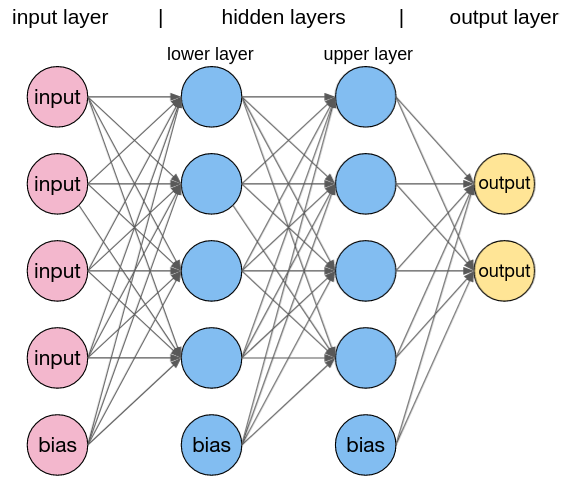

Existem diferentes tipos de conexões em uma rede MLP:

> **Totalmente conectada**: Todos os nós em uma camada estão conectados a todos os nós na camada adjacente.
>  
> **Parcialmente conectada**: Algumas conexões podem ser desativadas para promover a generalização em vez da especialização.
>
> **Localmente conectada**: As conexões podem ser ajustadas para que uma camada se concentre em um subconjunto específico das entradas, promovendo a cooperação entre regiões modulares.

A determinação dos pesos sinápticos entre os neurônios em diferentes camadas requer o uso de algoritmos de treinamento supervisionado, como o *Backpropagation Algorithm*. Esse algoritmo é baseado na correção de erros e envolve a retropropagação dos erros da camada de saída para as camadas intermediárias.

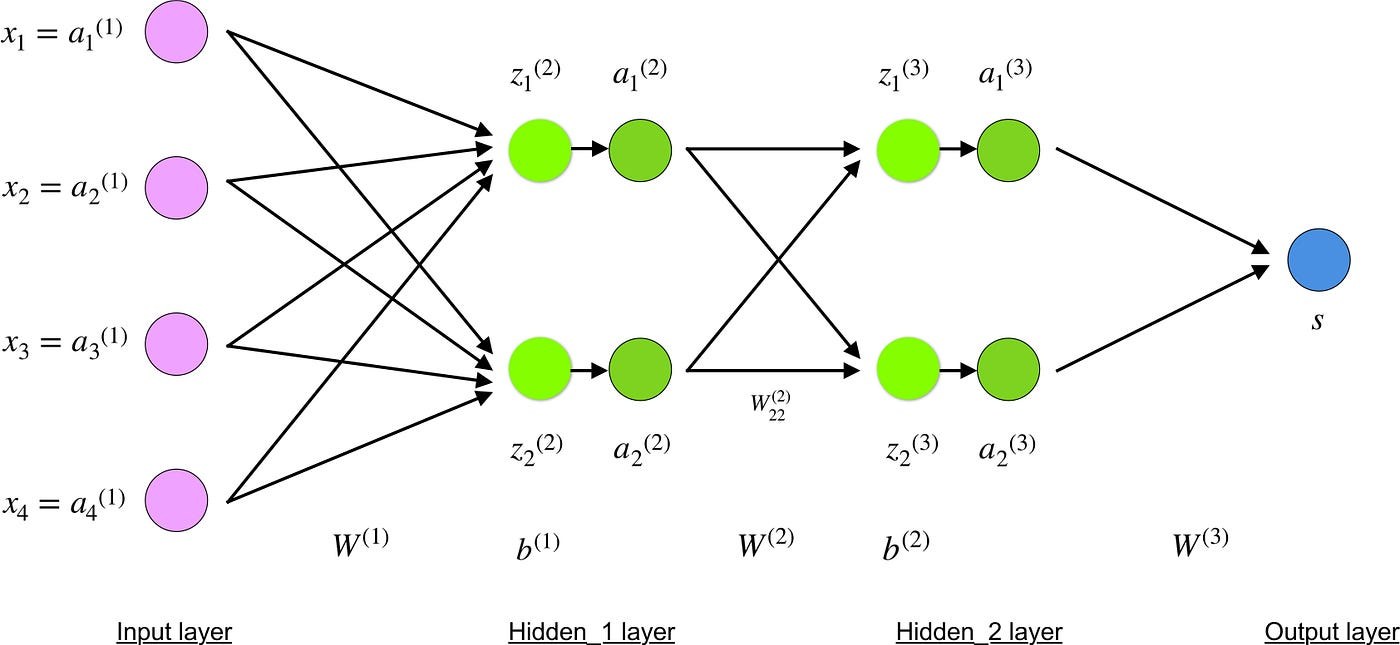

Para ilustrar o uso de MLPs, estamos aplicando essas redes a um conjunto de dados chamado "Lower Back Pain Symptoms Dataset" do Kaggle. Este conjunto de dados visa classificar indivíduos como "Normais" ou "Anormais" com base em características físicas na região da espinha dorsal

# Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

plt.style.use('Solarize_Light2')

# Dataset

O conjunto de dados "Lower Back Pain Symptoms Dataset" contém 310 observações e 13 atributos, sendo 12 preditores numéricos e 1 atributo de classe binária (sem dados demográficos). Ele trata da dor lombar, que pode surgir de problemas na complexa rede de músculos, nervos, ossos, discos e tendões na região lombar da coluna vertebral. As causas incluem irritação das raízes nervosas grandes e pequenas, tensão muscular, danos em ossos, ligamentos ou articulações, degeneração de discos intervertebrais, entre outros. Esses problemas podem gerar dor lombar, dor irradiada e espasmos musculares nas costas, resultando em dor intensa e limitações. O propósito do conjunto de dados é identificar, com base em detalhes físicos da coluna vertebral, se uma pessoa é considerada anormal ou normal.

In [ ]:
url = 'https://github.com/fernandesbarreto/MLP/raw/main/Dataset_spine.csv'
df = pd.read_csv(url, sep=',')

Vamos ver a quantidade de dados (linhas) e de campos (colunas) presentes nela:

In [ ]:
df.shape

(310, 14)

Abaixo estão listados todos os campos do dataframe, juntamente com seus respectivos tipos.

In [ ]:
df.dtypes

Col1           float64
Col2           float64
Col3           float64
Col4           float64
Col5           float64
Col6           float64
Col7           float64
Col8           float64
Col9           float64
Col10          float64
Col11          float64
Col12          float64
Class_att       object
Unnamed: 13     object
dtype: object

## Tratando o dataset

Conforme notado, as colunas atualmente carecem de nomes descritivos que comuniquem seu significado. Para resolver isso, iremos renomear as colunas de acordo com as convenções observadas no Kaggle.

In [ ]:
# Mapeando os novos nomes para as colunas
new_column_names = {
    "Col1": "pelvic_incidence",
    "Col2": "pelvic_tilt",
    "Col3": "lumbar_lordosis_angle",
    "Col4": "sacral_slope",
    "Col5": "pelvic_radius",
    "Col6": "degree_spondylolisthesis",
    "Col7": "pelvic_slope",
    "Col8": "Direct_tilt",
    "Col9": "thoracic_slope",
    "Col10": "cervical_tilt",
    "Col11": "sacrum_angle",
    "Col12": "scoliosis_slope"
}

# Renomeando as colunas no DataFrame
df = df.rename(columns=new_column_names)

# Removendo a coluna sem nome (e sem dados importantes)
df = df.drop(columns=["Unnamed: 13"])

# Averiguando se funcionou
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
pelvic_slope                float64
Direct_tilt                 float64
thoracic_slope              float64
cervical_tilt               float64
sacrum_angle                float64
scoliosis_slope             float64
Class_att                    object
dtype: object

Antes de iniciarmos o treinamento das MLPs, precisamos realizar algumas modificações no conjunto de dados para prepará-lo adequadamente para o treinamento. Primeiramente, vamos eliminar as linhas do DataFrame que contenham valores ausentes. Em seguida, faremos a conversão da coluna "Class_att" para valores binários.

In [ ]:
# Remove as linhas que contêm valores ausentes no DataFrame
df = df.dropna()

# Mapeia os valores da coluna "Class_att" para códigos numéricos
class_mapping = {"Normal": 0, "Abnormal": 1}
df["Class_att"] = df["Class_att"].map(class_mapping)

# Exibe informações sobre o DataFrame após as modificações
print("Formato (Shape):\n", df.shape)
print("\nTipos de dados:")
print(df.dtypes)

Formato (Shape):
 (310, 13)

Tipos de dados:
pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
pelvic_slope                float64
Direct_tilt                 float64
thoracic_slope              float64
cervical_tilt               float64
sacrum_angle                float64
scoliosis_slope             float64
Class_att                     int64
dtype: object


## Identificando outliers

Abaixo estão os valores numéricos da base de dados. É possível examinar várias informações importantes, como a quantidade de dados presentes em cada campo, a média, o desvio padrão, os valores mínimo e máximo e os quartis. Essas informações permitem compreender a distribuição dos dados em cada campo e auxiliam na identificação de possíveis outliers ou padrões interessantes na base de dados.

In [ ]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


O boxplot é um gráfico que fornece uma visualização da distribuição dos dados e é frequentemente usado para identificar a presença de outliers. O gráfico consiste em:

- um retângulo que representa o intervalo interquartil (IQR) dos dados, ou seja, a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1) da distribuição;

- dentro do retângulo, uma linha horizontal representa a mediana dos dados;

- fora do retângulo, linhas horizontais (chamadas de "bigodes") se estendem até os valores mínimo e máximo dos dados que não são considerados outliers.

Qualquer valor que esteja fora do intervalo dos bigodes é considerado um outlier e é representado por um ponto individual no gráfico. Esses pontos são frequentemente considerados incomuns ou anômalos em relação aos demais dados na distribuição.

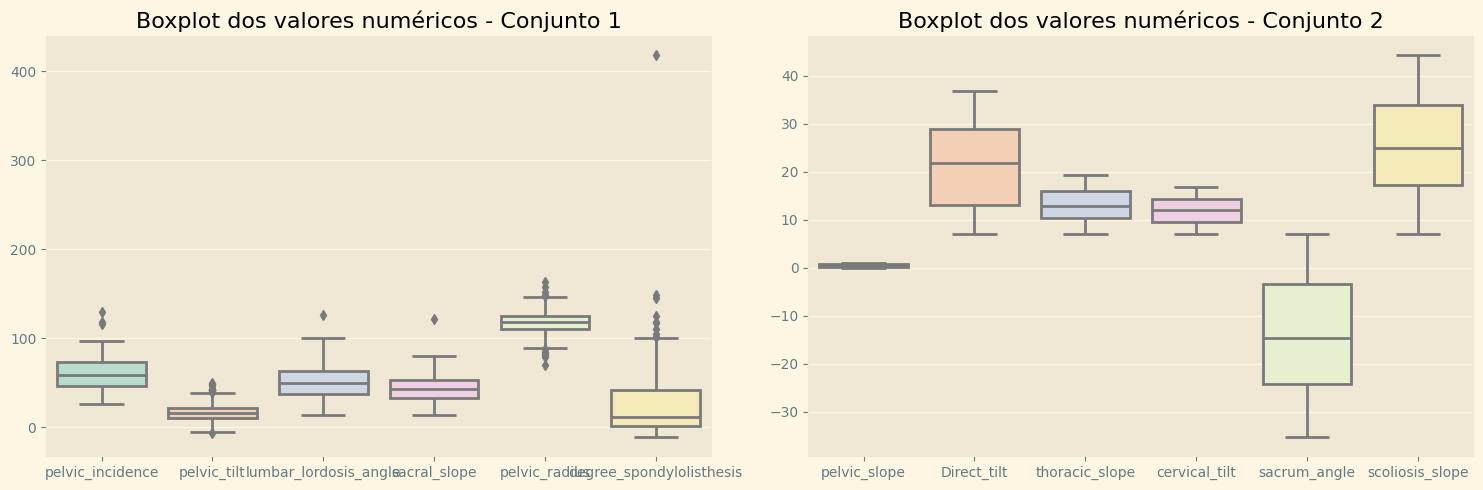

In [ ]:
# Selecionar colunas numéricas de interesse
columns_of_interest1 = [
    'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
    'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'
]

columns_of_interest2 = [
    'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
    'sacrum_angle', 'scoliosis_slope'
]

df_num1 = df[columns_of_interest1]
df_num2 = df[columns_of_interest2]

# Definir estilo de gráfico
sns.set_palette('Pastel2')

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotar boxplots
sns.boxplot(data=df_num1, ax=axes[0])
axes[0].set_title("Boxplot dos valores numéricos - Conjunto 1")

sns.boxplot(data=df_num2, ax=axes[1])
axes[1].set_title("Boxplot dos valores numéricos - Conjunto 2")

plt.tight_layout()
plt.show()

### Removendo outliers

Para remover os outliers de forma mais precisa, utilizamos a regra do 1,5 IQR. Essa regra define limites superior e inferior baseados no intervalo interquartil (IQR) dos dados. Valores que estiverem acima ou abaixo desses limites são considerados outliers e removidos do conjunto de dados. Assim, garantimos uma análise mais precisa e confiável dos dados, considerando apenas os valores que realmente representam a distribuição dos mesmos.

In [ ]:
def remove_outliers_1_5_iqr(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df

cols = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

df_no_outliers = remove_outliers_1_5_iqr(df, cols)

In [ ]:
df_no_outliers.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,58.749922,16.119885,50.471788,42.630038,117.982512,20.146843,0.469685,21.272639,13.201501,11.870851,-14.072359,26.071490,0.641304
std,15.666257,8.102616,17.934465,12.498329,11.179399,24.319558,0.284620,8.669856,3.394889,2.929010,12.190166,10.357185,0.480489
min,26.147921,-5.845994,14.000000,13.366931,89.471834,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.069800,0.000000
25%,46.339666,10.490537,36.102696,33.309343,111.206528,1.009837,0.214414,12.981000,10.612025,9.280482,-24.280185,17.577375,0.000000
50%,56.637032,15.739107,47.627403,42.404912,118.353355,7.897616,0.475989,21.981100,13.169300,11.904625,-15.041951,25.545900,1.000000
75%,70.420507,20.741495,61.762922,52.883139,125.205651,35.426657,0.698865,28.838725,15.967125,14.351965,-3.490406,34.304850,1.000000
max,96.657315,38.750670,100.744220,78.794052,145.601033,92.027277,0.998827,36.743900,19.324000,16.784860,6.972071,44.341200,1.000000


Abaixo está o boxplot do novo conjunto de dados com os outliers removidos.

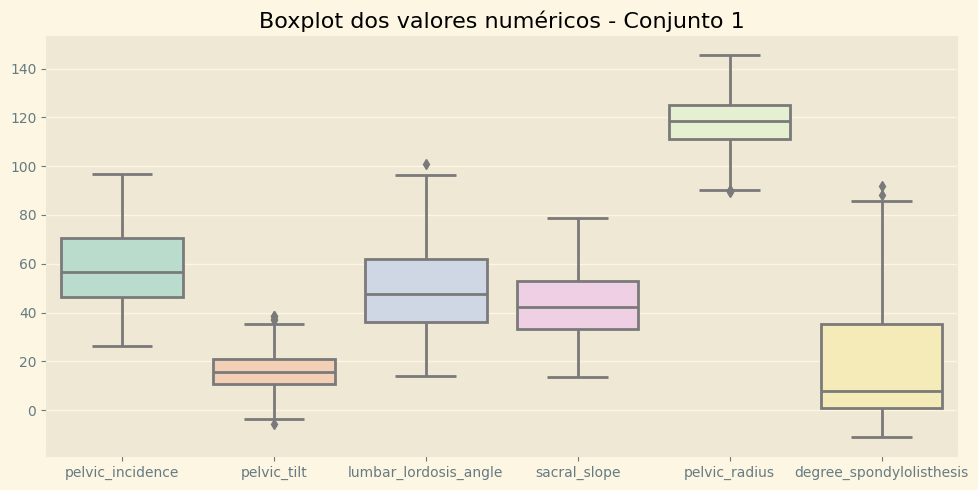

In [ ]:
# Selecionar colunas numéricas de interesse
columns_of_interest1 = [
    'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
    'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'
]

df_num1 = df_no_outliers[columns_of_interest1]

# Definir estilo de gráfico
sns.set_palette('Pastel2')

# Plotar boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_num1)
plt.title("Boxplot dos valores numéricos - Conjunto 1")
plt.tight_layout()
plt.show()

## Aplicando Técnica SMOTE

Vamos dar uma olhada nos nossos dados:

In [ ]:
df_no_outliers

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,0


É dito nas informações do DataFrame que há um desequilíbrio entre
 a quantidade de "Normal" e "Abnormal". Vamos verificar isso:

In [ ]:
# Contando os valores "Normal" e "Abnormal" na coluna "Class_att"
df_no_outliers["Class_att"].value_counts()

1    177
0     99
Name: Class_att, dtype: int64

☝ **O método SMOTE é uma técnica que visa equilibrar as classes em um conjunto de dados desbalanceado, especialmente aumentando a quantidade de dados na classe minoritária. Isso é alcançado através da geração de dados sintéticos. No nosso contexto, estamos aplicando a técnica SMOTE à nossa base de dados para mitigar o impacto do desequilíbrio resultante da escassez de dados da classe "Normal".**

In [ ]:
# Separando os preditores e o atributo de classe
X = df_no_outliers.drop("Class_att", axis=1)
y = df_no_outliers["Class_att"]

# Cria uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicando o SMOTE aos dados
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crie um novo DataFrame com os dados ressampled
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Class_att"] = y_resampled

# Verifique o balanceamento das classes após a aplicação do SMOTE
print("Contagem de classes após o SMOTE:")
print(df_resampled["Class_att"].value_counts())

Contagem de classes após o SMOTE:
1    177
0    177
Name: Class_att, dtype: int64


In [ ]:
df_resampled

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.566100,14.538600,15.304680,-28.658501,43.512300,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.887400,17.532300,16.784860,-25.530607,16.110200,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.834300,17.486100,16.658970,-29.031888,19.222100,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.560300,12.707400,11.424470,-30.470246,18.832900,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.494000,15.954600,8.872370,-16.378376,24.917100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,42.611011,8.549639,35.957232,34.061372,120.473248,1.560534,0.443043,14.740512,14.271073,10.235150,5.637203,35.383144,0
350,49.946020,13.389397,36.696180,36.556623,120.068277,2.761193,0.742841,32.223864,14.132236,14.630093,-6.971184,15.443568,0
351,62.515677,19.916618,48.736996,42.599060,120.692079,4.167575,0.325042,14.176308,8.372814,11.548729,-18.930919,42.144750,0
352,49.873942,7.161960,36.436589,42.711982,117.457328,-0.275777,0.195587,21.795150,8.164204,10.305956,-0.377693,13.336514,0


## Preparando para treinamento

Com o DataFrame organizado dessa maneira, estamos prontos para proceder com a distribuição dos dados. Para garantir um treinamento eficaz do modelo, é crucial dividir o conjunto de dados em dois segmentos distintos: um destinado ao treinamento e outro para testar o desempenho do modelo. Essa abordagem permite avaliar como o modelo se comporta em situações que ele ainda não enfrentou, ampliando assim as chances de obter insights que reflitam de maneira mais precisa em cenários reais.

Para realizar essa divisão de forma conveniente, fazemos uso da ferramenta `"train_test_split"` disponível no scikit-learn. Através dessa função, estabelecemos "X" como os atributos que serão analisados e "y" como as classificações que desejamos prever. Esse processo é essencial para garantir a validação e a eficácia do nosso modelo em situações diversas.

In [ ]:
# Dividir os dados em conjuntos de treinamento e validação
X = df_resampled.drop(["Class_att"], axis=1)
y = df_resampled["Class_att"]

# Utilizando a função train_test_split para criar conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

# Criar novos DataFrames para conjuntos de treinamento e teste
df_train = X_train.assign(Class_att=y_train)
df_test = X_test.assign(Class_att=y_test)

### Visualização dos gráficos


In [ ]:
def structure_data(attribute):
    """
    Organizes training and test data for each attribute.

    Returns a structure:
    [0]    = Training data
    [0][0] = Training data with normal result
    [0][1] = Training data with abnormal result
    [1]    = Test data
    [1][0] = Test data with normal result
    [1][1] = Test data with abnormal result
    """
    train_normal = df_train.loc[df_train["Class_att"] == 0, attribute].tolist()
    train_abnormal = df_train.loc[df_train["Class_att"] == 1, attribute].tolist()
    test_normal = df_test.loc[df_test["Class_att"] == 0, attribute].tolist()
    test_abnormal = df_test.loc[df_test["Class_att"] == 1, attribute].tolist()

    return [[train_normal, train_abnormal], [test_normal, test_abnormal]]

# Organize data for each attribute
pelvic_incidence = structure_data('pelvic_incidence')
pelvic_tilt = structure_data('pelvic_tilt')
lumbar_lordosis_angle = structure_data('lumbar_lordosis_angle')
sacral_slope = structure_data('sacral_slope')
pelvic_radius = structure_data('pelvic_radius')
degree_spondylolisthesis = structure_data('degree_spondylolisthesis')
pelvic_slope = structure_data('pelvic_slope')
direct_tilt = structure_data('Direct_tilt')
thoracic_slope = structure_data('thoracic_slope')
cervical_tilt = structure_data('cervical_tilt')
sacrum_angle = structure_data('sacrum_angle')
scoliosis_slope = structure_data('scoliosis_slope')

Vamos utilizar de um gráfico de boxplot para visualizar o comportamento geral dos atributos para cada categoria.

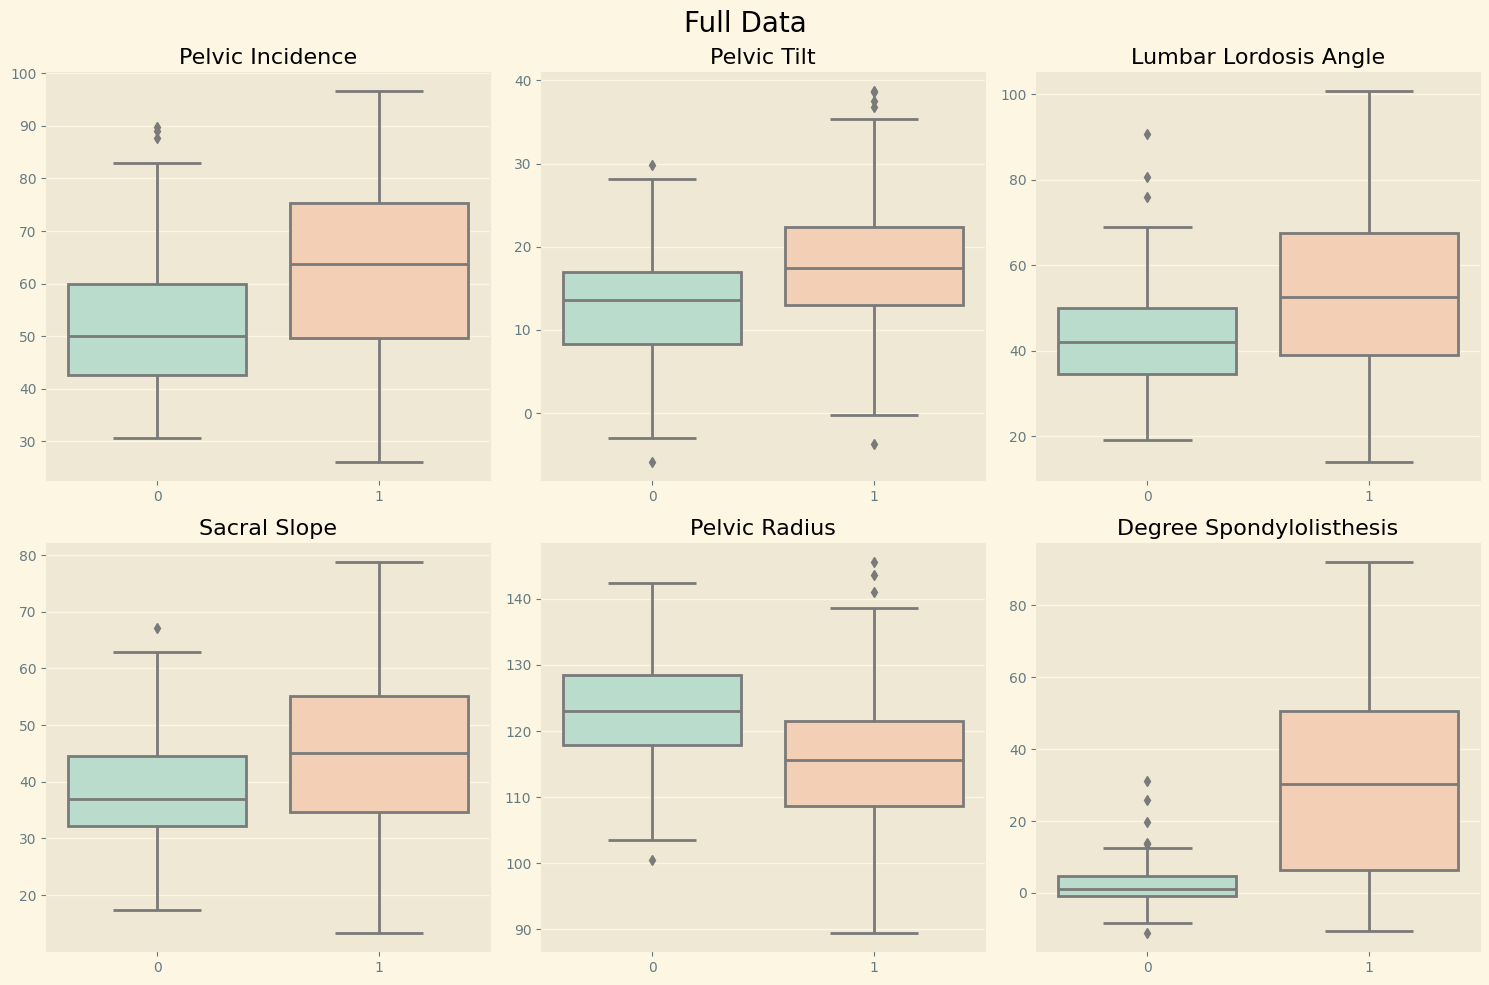

In [ ]:
def get_full_data(arr):
    return [arr[0][0] + arr[1][0], arr[0][1] + arr[1][1]]

attributes = [
    ("Pelvic Incidence", pelvic_incidence),
    ("Pelvic Tilt", pelvic_tilt),
    ("Lumbar Lordosis Angle", lumbar_lordosis_angle),
    ("Sacral Slope", sacral_slope),
    ("Pelvic Radius", pelvic_radius),
    ("Degree Spondylolisthesis", degree_spondylolisthesis),
    ("Pelvic Slope", pelvic_slope),
    ("Direct Tilt", direct_tilt),
    ("Thoracic Slope", thoracic_slope),
    ("Cervical Tilt", cervical_tilt),
    ("Sacrum Angle", sacrum_angle),
    ("Scoliosis Slope", scoliosis_slope)
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Full Data", fontsize=20)

for (title, attribute), ax in zip(attributes, axes.ravel()):
    sns.boxplot(data=get_full_data(attribute), ax=ax, palette='Pastel2')
    ax.set_title(title)

plt.tight_layout()
plt.show()

Alguns atributos mantêm comportamentos bastante consistentes, independentemente de serem classificados como "Normal" (0) ou "Anormal" (1). Contudo, há casos nos quais diferenças notáveis são facilmente identificadas, como em "Degree Spondylolisthesis". É provável que o modelo se apoie fortemente nesses aspectos para realizar sua classificação, embora não dependa exclusivamente deles.

Agora, vamos conduzir uma análise semelhante à que realizamos no conjunto de dados completo para cada distribuição individualmente.

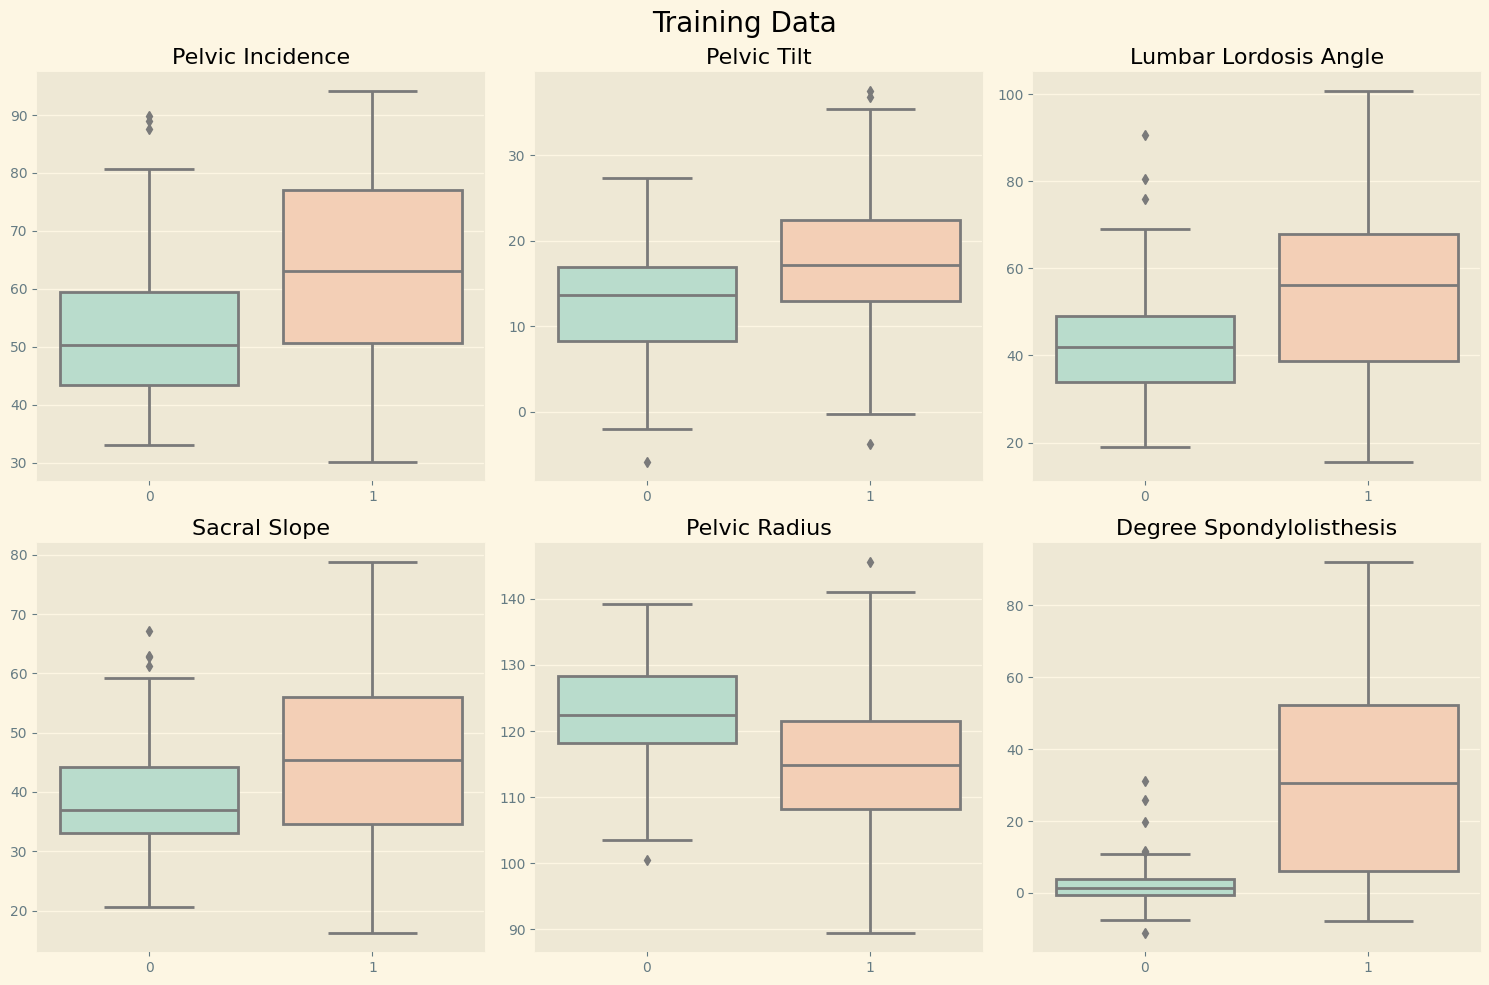

In [ ]:
attributes = [
    ("Pelvic Incidence", pelvic_incidence[0]),
    ("Pelvic Tilt", pelvic_tilt[0]),
    ("Lumbar Lordosis Angle", lumbar_lordosis_angle[0]),
    ("Sacral Slope", sacral_slope[0]),
    ("Pelvic Radius", pelvic_radius[0]),
    ("Degree Spondylolisthesis", degree_spondylolisthesis[0]),
    ("Pelvic Slope", pelvic_slope[0]),
    ("Direct Tilt", direct_tilt[0]),
    ("Thoracic Slope", thoracic_slope[0]),
    ("Cervical Tilt", cervical_tilt[0]),
    ("Sacrum Angle", sacrum_angle[0]),
    ("Scoliosis Slope", scoliosis_slope[0])
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Training Data", fontsize=20)

for (title, attribute), ax in zip(attributes, axes.ravel()):
    sns.boxplot(data=attribute, ax=ax, palette='Pastel2')
    ax.set_title(title)

plt.tight_layout()
plt.show()

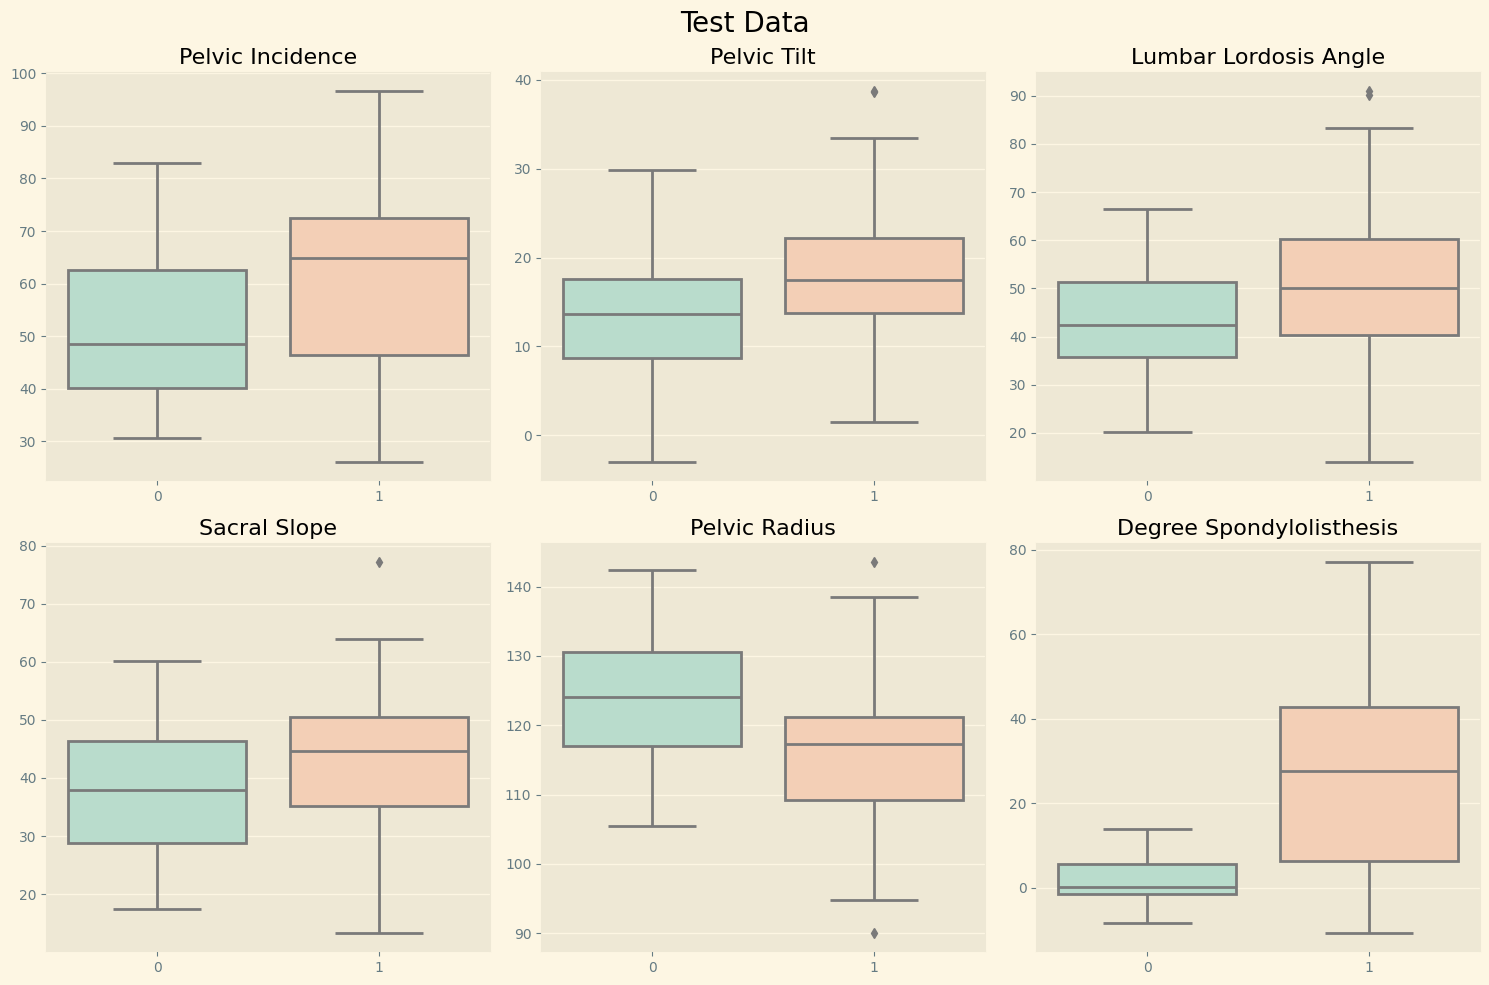

In [ ]:
attributes = [
    ("Pelvic Incidence", pelvic_incidence[1]),
    ("Pelvic Tilt", pelvic_tilt[1]),
    ("Lumbar Lordosis Angle", lumbar_lordosis_angle[1]),
    ("Sacral Slope", sacral_slope[1]),
    ("Pelvic Radius", pelvic_radius[1]),
    ("Degree Spondylolisthesis", degree_spondylolisthesis[1]),
    ("Pelvic Slope", pelvic_slope[1]),
    ("Direct Tilt", direct_tilt[1]),
    ("Thoracic Slope", thoracic_slope[1]),
    ("Cervical Tilt", cervical_tilt[1]),
    ("Sacrum Angle", sacrum_angle[1]),
    ("Scoliosis Slope", scoliosis_slope[1])
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Test Data", fontsize=20)

for (title, attribute), ax in zip(attributes, axes.ravel()):
    sns.boxplot(data=attribute, ax=ax, palette='Pastel2')
    ax.set_title(title)

plt.tight_layout()
plt.show()

É perceptível que as características fundamentais dos atributos foram preservadas nas distribuições geradas. No entanto, é importante ressaltar que essas características não são idênticas, o que proporciona a possibilidade de realizar testes do modelo em cenários mais amplos, que vão além das situações encontradas durante o treinamento.

# Treinamento de MLPs

Nesta etapa do processo, estamos prontos para iniciar o treinamento de vários Multilayer Perceptrons (MLPs) com o objetivo de avaliar seu desempenho na tarefa apresentada pelo conjunto de dados. Serão treinados cinco modelos diferentes, cada um com variações em relação a certos parâmetros. Abaixo está definida uma função que facilitará o treinamento dos modelos, bem como a obtenção de matrizes de confusão e métricas de desempenho para análise posterior.

Antes de analisar os resultados dos MLPs, é importante destacar as características que serão comuns a todos eles:

* **Função de Ativação:** optamos por usar a função logística como a função de ativação para as unidades neurais. A escolha dessa função se baseia na sua adequação para lidar com números decimais, que são frequentemente encontrados nos dados do conjunto.

* **Iterações máximas:** definimos o número máximo de iterações como 10000. Isso significa que o treinamento será interrompido após atingir 10000 iterações, não havendo mais ajustes nos pesos da rede após esse ponto.

* **Tolerância:** a tolerância é um valor estabelecido na implementação para medir a melhora no desempenho do modelo. Se nas últimas 10 épocas de treinamento o modelo não mostrar uma melhora significativa acima dessa tolerância (por padrão, definida como $10^{-4}$), o treinamento para.

Agora, estamos prontos para analisar cada cenário de treinamento!

In [ ]:
#MLPs training and scoring
def mlp_processing(layers, lrn_rate, slvr):
    # Training
    mlp = MLPClassifier(hidden_layer_sizes=layers, activation='logistic', learning_rate=lrn_rate, solver=slvr, max_iter=10000, tol=1e-4)
    mlp.fit(X_train, y_train)

    # Scoring
    training_scores.append(mlp.score(X_train, y_train))
    test_scores.append(mlp.score(X_test, y_test))
    print("Training set score: {:.4f}".format(mlp.score(X_train, y_train)))
    print("Test set score: {:.4f}".format(mlp.score(X_test, y_test)))

    # Label update
    scores_label.append('MLP {}'.format(len(scores_label) + 1))

    # Confusion matrix
    y_pred = mlp.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

# Reset scores and graph labels before (re)doing training
training_scores = list()
test_scores = list()
scores_label = list()

## Primeiro MLP

É um modelo simples com uma única camada oculta contendo **10 perceptrons**. A taxa de aprendizado é mantida **constante** ao longo do treinamento e o algoritmo de otimização **"adam"** é utilizado para ajustar os pesos da rede. O Adam considera as médias dos gradientes e seus quadrados para ajustar as taxas de aprendizado.

Training set score: 0.9358
Test set score: 0.8090


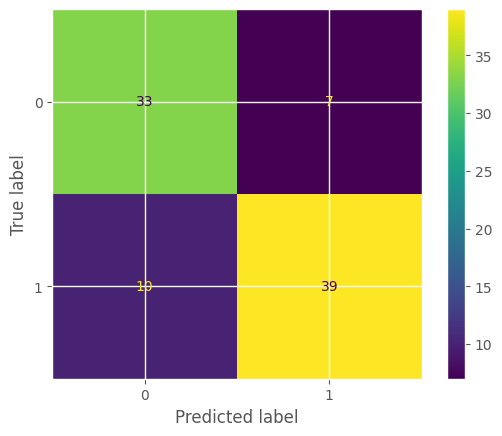

In [ ]:
mlp_processing((10), 'constant', 'adam')

Apesar de sua simplicidade, o modelo apresenta desempenho satisfatório, atingindo cerca de 93% de acurácia no treinamento e aproximadamente 81% no teste. No entanto, a análise da matriz de confusão revela um desafio: o modelo tem dificuldade em identificar corretamente casos "anormais", resultando em Falsos Negativos. Para melhorar, será necessário ajustar o modelo para aumentar a sensibilidade nessa detecção específica.

## Segundo MLP

Ao invés de uma única camada com 10 perceptrons, agora temos **três camadas** com essa mesma quantidade de perceptrons cada, sendo um modelo um pouco mais complexo.

Training set score: 0.9774
Test set score: 0.8202


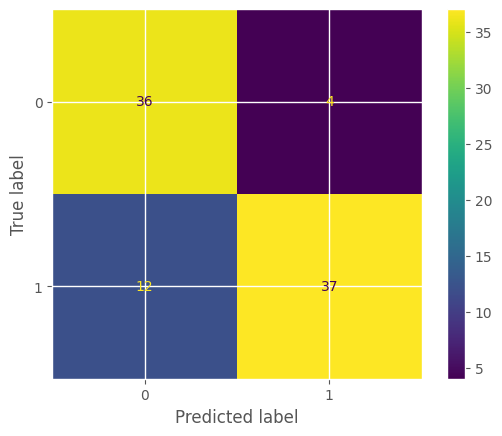

In [ ]:
mlp_processing((10, 10, 10), 'constant', 'adam')

In [ ]:
scores_label

['MLP 1', 'MLP 2']

Ao observar os resultados do treinamento, vemos que a taxa de acerto do MLP na distribuição de treino sobe, alcançando cerca de 98%. Isso não necessariamente é algo positivo, visto que podemos estar lidando com um cenário de overfitting. No entanto, observamos que houve um ganho na taxa de acerto também na distribução para teste, alcançando 82%. Vemos que o problema de acertos nos casos classificados como "anormal" segue.

## Terceiro MLP

Aumentamos a quantidade de perceptrons em cada uma das **três camadas**, de 10 para **100 perceptrons**, gerando ao todo mil vezes mais perceptrons que o modelo anterior.

Training set score: 1.0000
Test set score: 0.8876


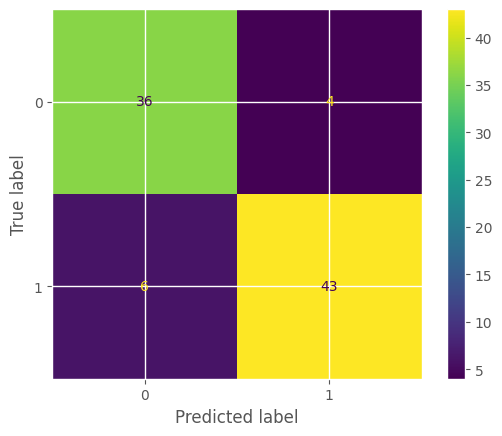

In [ ]:
mlp_processing((100, 100, 100), 'constant', 'adam')

Após as alterações nas camadas, os resultados do treinamento revelam uma acurácia perfeita de 100% no conjunto de treinamento. No entanto, essa alta acurácia não é completamente refletida no conjunto de teste, onde a acurácia é cerca de 89%. Essa diferença sugere que o modelo pode estar sofrendo de overfitting, já que está se ajustando de forma excessiva aos dados de treinamento e não generalizando tão bem para novos dados.

## Quarto MLP

Mantendo a quantidade de perceptrons e a forma que os mesmos estão distribuídos, vamos agora alterar a função de otimização para uma mais sofisticada, que é a "Limited-memory BFGS".

Training set score: 1.0000
Test set score: 0.7753


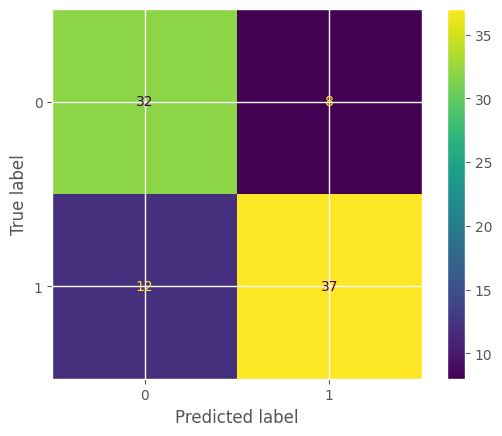

In [ ]:
mlp_processing((100, 100, 100), 'constant', 'lbfgs')

Após as modificações nas camadas, os resultados revelam um desempenho notável no conjunto de treinamento, atingindo uma acurácia perfeita de 100%. No entanto, essa alta taxa de acerto não se traduz integralmente para o conjunto de teste, onde a acurácia é aproximadamente 77%. Essa disparidade sugere novamente a possibilidade de overfitting.

## Quinto MLP

Por fim, tentamos atualizar o funcionamento da taxa de aprendizado. Seguindo a documentação, tal mudança só possui efeito ao modificar, também, o algoritmo de otimização para o "Stochastic Gradient Descent".

Training set score: 0.8642
Test set score: 0.7753


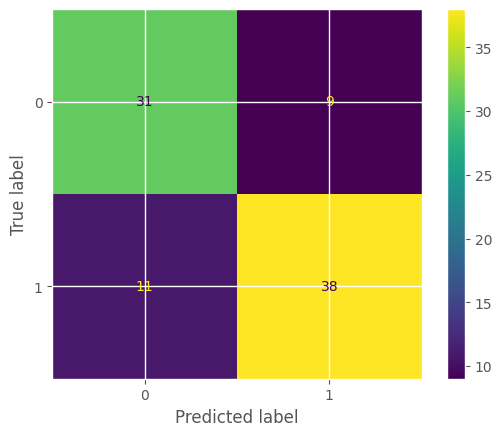

In [ ]:
mlp_processing((10), 'adaptive', 'sgd')

Após a evolução das camadas, os resultados no conjunto de treinamento demonstram um desempenho sólido, com uma acurácia de aproximadamente 86%. No entanto, essa alta acurácia não é totalmente refletida no conjunto de teste, onde a acurácia é cerca de 77%. Como esses valores são piores que o primeiro MLP, decidimos não continuar os experimentos por esse caminho.

# Comparando desempenhos

Para melhor visualizar a comparação entre as acurácias, podemos usar de um gráfico, que segue:

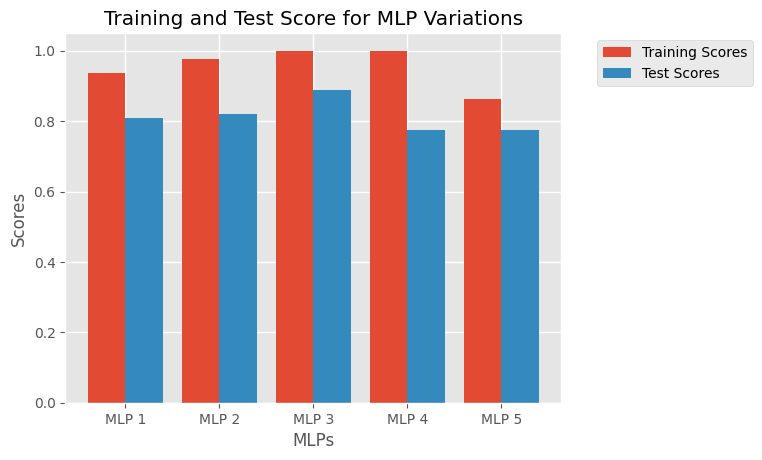

In [ ]:
# Score results bar plot for all MLPs
plt.style.use('ggplot')

X_axis = np.arange(len(scores_label))

#scores_label

plt.bar(X_axis - 0.2, training_scores, 0.4, label="Training Scores")
plt.bar(X_axis + 0.2, test_scores, 0.4, label="Test Scores")

plt.xticks(X_axis, scores_label)
plt.xlabel("MLPs")
plt.ylabel("Scores")
plt.title("Training and Test Score for MLP Variations")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

Observando os valores de training_score, podemos notar uma progressão ascendente na acurácia à medida que a complexidade do modelo aumenta. Isso é indicado pelos resultados gradualmente maiores de acurácia no conjunto de treinamento. Modelos mais complexos tendem a se ajustar mais aos dados de treinamento, resultando em uma acurácia maior nesse conjunto.

Entretanto, essa melhoria na acurácia de treinamento não se reflete uniformemente nos resultados de teste (test_score). Observamos que, em muitos casos, a acurácia no conjunto de teste atinge um limite ou começa a diminuir à medida que a acurácia de treinamento se aproxima de 100%. Isso é indicativo de overfitting, onde o modelo se adapta excessivamente aos dados de treinamento e não generaliza bem para dados não vistos.

A discrepância entre os valores de treinamento e teste é particularmente notável nos modelos 3 e 4, onde as pontuações de teste variam, indicando a incapacidade desses modelos de generalizar para novos dados.

# Conclusão

Os resultados do treinamento indicaram que os modelos mais complexos (terceiro e quarto MLP) alcançaram altas taxas de acerto no conjunto de treinamento, mas essa alta acurácia não se traduziu completamente para o conjunto de teste. Isso sugere que esses modelos podem estar sofrendo de overfitting, ou seja, estão se ajustando excessivamente aos dados de treinamento e não generalizando bem para novos dados.

Por outro lado, o primeiro MLP, um modelo mais simples, apresentou um desempenho razoável, com boa generalização para o conjunto de teste, apesar de uma acurácia inferior no conjunto de treinamento. Os modelos intermediários (segundo e quinto MLP) também tiveram resultados competitivos, embora não tenham superado o primeiro MLP em termos de generalização.

Em resumo, a escolha do modelo mais adequado depende do equilíbrio entre complexidade e capacidade de generalização desejada. Um modelo mais complexo pode se ajustar melhor aos dados de treinamento, mas corre o risco de overfitting. Portanto, a seleção do modelo deve levar em consideração o objetivo da classificação, a quantidade de dados disponíveis e a necessidade de generalização para novos casos. Além disso, ajustes adicionais nos hiperparâmetros dos modelos podem ser explorados para otimizar o desempenho.